YTM for the first bond on 01-06: 0.0108
Skipping closing_price_01-11 (missing data)
Skipping closing_price_01-12 (missing data)
                   closing_price_01-06  closing_price_01-07  \
years_to_maturity                                             
0.147844                      0.010829             0.010829   
0.651608                      0.065041             0.064628   
1.147159                      0.066710             0.066920   
1.650924                      0.061091             0.061371   
2.146475                      0.060079             0.060397   
2.650240                      0.058090             0.058676   
3.148528                      0.057252             0.057252   
3.652293                      0.058342             0.058102   
4.147844                      0.058293             0.058606   
4.651608                      0.059387             0.059764   

                   closing_price_01-08  closing_price_01-09  \
years_to_maturity                                   

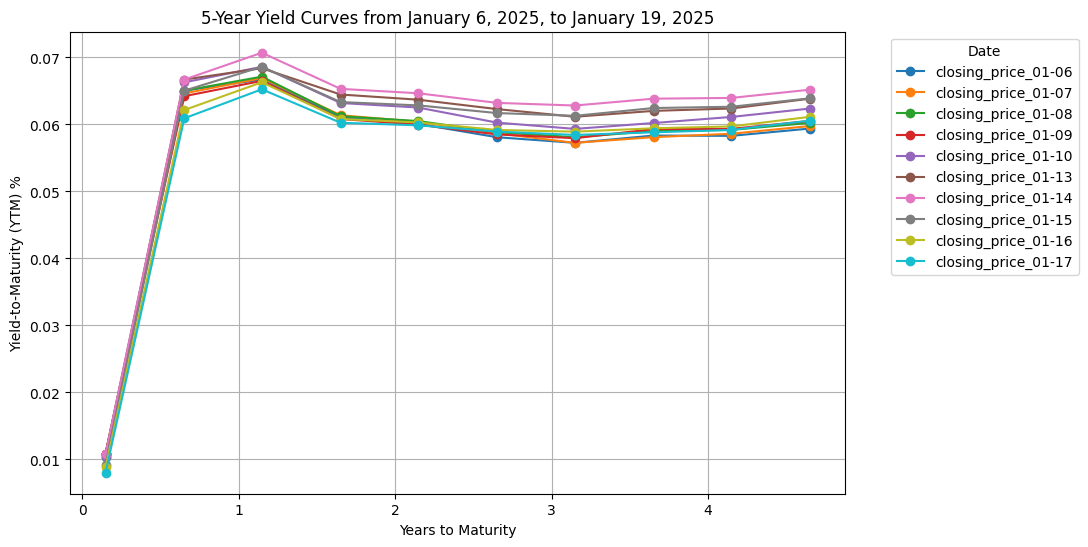

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Define the bond data
data = {
    "ISIN": ["CA135087K528", "CA135087K940", "CA135087L518", "CA135087L930", "CA135087M847", 
             "CA135087N837", "CA135087P576", "CA135087P576", "CA135087Q988", "CA135087R895"],
    "coupon": [1.25, 0.50, 0.25, 1.00, 1.25, 2.75, 3.50, 3.25, 4.00, 3.50],  # in percentage
    "issue_date": ["10/11/2019", "4/3/2020", "10/9/2020", "4/16/2021", "10/15/2021", 
                   "5/13/2022", "10/21/2022", "4/21/2023", "10/13/2023", "4/8/2024"],
    "maturity_date": ["3/1/2025", "9/1/2025", "3/1/2026", "9/1/2026", "3/1/2027", 
                      "9/1/2027", "3/1/2028", "9/1/2028", "3/1/2029", "9/1/2029"],
    "closing_price_01-06": [99.73, 98.4, 96.99, 97.01, 96.62, 99.63, 101.82, 101.1, 104.07, 102.22],
    "closing_price_01-07": [99.73, 98.41, 96.98, 96.99, 96.59, 99.56, 101.82, 101.14, 104.01, 102.14],
    "closing_price_01-08": [99.74, 98.4, 96.97, 97, 96.58, 99.54, 101.7, 100.99, 103.9, 102.04],
    "closing_price_01-09": [99.73, 98.42, 97, 97.03, 96.63, 99.58, 101.72, 100.94, 103.87, 101.98],
    "closing_price_01-10": [99.74, 98.37, 96.9, 96.86, 96.39, 99.37, 101.52, 100.79, 103.53, 101.59],
    "closing_price_01-13": [99.73, 98.36, 96.91, 96.77, 96.28, 99.13, 101.26, 100.49, 103.29, 101.28],
    "closing_price_01-14": [99.73, 98.36, 96.8, 96.71, 96.19, 99.02, 101.02, 100.19, 102.99, 101],   
    "closing_price_01-15": [99.77, 98.4, 96.9, 96.85, 96.36, 99.2, 101.24, 100.42, 103.24, 101.27],   
    "closing_price_01-16": [99.78, 98.47, 97.01, 97.03, 96.6, 99.5, 101.58, 100.92, 103.8, 101.85],   
    "closing_price_01-17": [99.8 ,98.5, 97.06, 97.07,96.64, 99.53, 101.65, 101.02, 103.9,101.97],   


}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Define a function to calculate YTM
def calculate_ytm(price, coupon, face_value, maturity_date, issue_date, settlement_date):
    """
    Calculate YTM using the bond pricing formula.
    """
    # Convert dates to datetime objects
    maturity_date = pd.to_datetime(maturity_date, format="%m/%d/%Y")
    settlement_date = pd.to_datetime(settlement_date, format="%m/%d/%Y")
    
    # Calculate time to maturity in years
    time_to_maturity = (maturity_date - settlement_date).days / 365.25
    
    if time_to_maturity <= 0:
        return None  # Bond has matured, YTM is undefined
    
    # Calculate the number of coupon payments (semi-annual)
    num_periods = max(1, int(time_to_maturity * 2))  # Ensure at least 1 period

    # Calculate the coupon payment per period (semi-annual)
    coupon_payment = (coupon / 100) * face_value / 2

    # Define the bond pricing function
    def bond_price(ytm):
        cash_flows = [coupon_payment] * num_periods
        if num_periods > 1:
            cash_flows[-1] += face_value  # Add face value at maturity
        else:
            cash_flows = [face_value]  # Zero-coupon bond case

        discount_factors = [(1 + ytm / 2) ** (t + 1) for t in range(num_periods)]
        return sum(cf / df for cf, df in zip(cash_flows, discount_factors))
    
    # Use Newton's method to solve for YTM
    try:
        ytm = newton(lambda y: bond_price(y) - price, x0=0.05, maxiter=1000)
        return ytm * 2  # Annualize the YTM
    except RuntimeError:
        return None  # If Newton's method fails, return None

    
    # Define the bond pricing function
    def bond_price(ytm):
        cash_flows = [coupon_payment] * num_periods
        cash_flows[-1] += face_value  # Add face value at maturity
        discount_factors = [(1 + ytm / 2) ** (t + 1) for t in range(num_periods)]
        return sum(cf / df for cf, df in zip(cash_flows, discount_factors))
    
    # Use Newton's method to solve for YTM
    ytm = newton(lambda y: bond_price(y) - price, x0=0.05, maxiter=1000)
    return ytm * 2  # Annualize the YTM

# Example: Calculate YTM for the first bond on January 6, 2025
ytm_example = calculate_ytm(
    price=99.73,  # Closing price on 01-06
    coupon=1.25,  # Coupon rate
    face_value=100,  # Face value
    maturity_date="3/1/2025",  # Maturity date
    issue_date="10/11/2019",  # Issue date
    settlement_date="1/6/2025"  # Settlement date (01-06)
)

print(f"YTM for the first bond on 01-06: {ytm_example:.4f}")

# Calculate YTM for all bonds and all days
ytm_data = {}

for day in range(6, 18):  # Loop through available days
    day_key = f"closing_price_01-{day:02d}"
    
    if day_key not in df.columns:
        print(f"Skipping {day_key} (missing data)")
        continue  # Skip if the day's data is missing

    ytm_data[day_key] = []
    
    for _, row in df.iterrows():
        price = row[day_key]

        if pd.isna(price):  # Handle missing price for specific bonds
            ytm_data[day_key].append(None)
            continue

        ytm = calculate_ytm(
            price=price,
            coupon=row["coupon"],
            face_value=100,
            maturity_date=row["maturity_date"],
            issue_date=row["issue_date"],
            settlement_date=f"1/{day}/2025"
        )
        ytm_data[day_key].append(ytm)

# ytm_data = {}
# for day in range(6, 18):  # Days from 01-06 to 01-19
#     ytm_data[f"01-{day:02d}"] = []
#     for i, row in df.iterrows():
#         price = row[f"closing_price_01-{day:02d}"]
#         ytm = calculate_ytm(
#             price=price,
#             coupon=row["coupon"],
#             face_value=100,
#             maturity_date=row["maturity_date"],
#             issue_date=row["issue_date"],
#             settlement_date=f"1/{day}/2025"
#         )
#         ytm_data[f"01-{day:02d}"].append(ytm)
# Convert maturity dates to years to maturity (as of January 6, 2025)
df["maturity_date"] = pd.to_datetime(df["maturity_date"], format="%m/%d/%Y")
df["years_to_maturity"] = (df["maturity_date"] - pd.to_datetime("1/6/2025")).dt.days / 365.25

# Sort bonds by maturity
df = df.sort_values(by="years_to_maturity")

# Convert YTM data to a DataFrame
ytm_df = pd.DataFrame(ytm_data, index=df["years_to_maturity"])
print (ytm_df)

# Plot the yield curves for each day
plt.figure(figsize=(10, 6))
for day in ytm_df.columns:
    plt.plot(ytm_df.index, ytm_df[day], marker='o', linestyle='-', label=day)

plt.xlabel("Years to Maturity")  #  X-axis is years to maturity
plt.ylabel("Yield-to-Maturity (YTM) %")  #  Y-axis is yield in %
plt.title("5-Year Yield Curves from January 6, 2025, to January 19, 2025")
plt.legend(title="Date", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


Skipping closing_price_01-11 (missing data)
Skipping closing_price_01-12 (missing data)
{'1yr-0.12yr': np.float64(3.6737602364491195), '1yr-0.62yr': np.float64(3.534211470889126), '1yr-1.12yr': np.float64(2.4610412547589444), '1yr-1.62yr': np.float64(2.9307389341232115), '1yr-2.12yr': np.float64(2.749437286041556), '1yr-2.62yr': np.float64(2.7909747314421196), '1yr-3.12yr': np.float64(3.0628249389241358), '1yr-3.62yr': np.float64(3.0891554602787696), '1yr-4.12yr': np.float64(3.597756623511894)}
{0.14784394250513347: nan, 0.6516084873374401: np.float64(0.0650406504065034), 1.1471594798083504: np.float64(0.06671013263545153), 1.6509240246406571: np.float64(0.061090557370934516), 2.1464750171115674: np.float64(0.060078620574180626), 2.650239561943874: np.float64(0.05809019970681465), 3.1485284052019167: np.float64(0.05725164754938406), 3.652292950034223: np.float64(0.05834225367960889), 4.147843942505133: np.float64(0.058292934916188484), 4.65160848733744: np.float64(0.05938651164326673)}

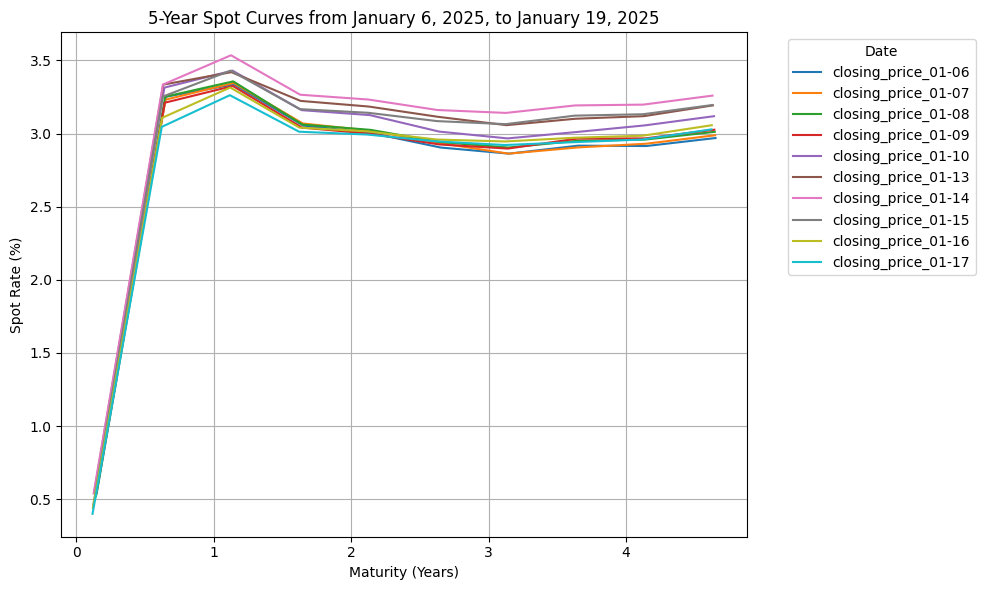

In [98]:
import numpy as np
import pandas as pd
from scipy.optimize import newton
import matplotlib.pyplot as plt

# Define the bond data
data = {
    "ISIN": ["CA135087K528", "CA135087K940", "CA135087L518", "CA135087L930", "CA135087M847", 
             "CA135087N837", "CA135087P576", "CA135087P576", "CA135087Q988", "CA135087R895"],
    "coupon": [1.25, 0.50, 0.25, 1.00, 1.25, 2.75, 3.50, 3.25, 4.00, 3.50],  # in percentage
    "issue_date": ["10/11/2019", "4/3/2020", "10/9/2020", "4/16/2021", "10/15/2021", 
                   "5/13/2022", "10/21/2022", "4/21/2023", "10/13/2023", "4/8/2024"],
    "maturity_date": ["3/1/2025", "9/1/2025", "3/1/2026", "9/1/2026", "3/1/2027", 
                      "9/1/2027", "3/1/2028", "9/1/2028", "3/1/2029", "9/1/2029"],
    "closing_price_01-06": [99.73, 98.4, 96.99, 97.01, 96.62, 99.63, 101.82, 101.1, 104.07, 102.22],
    "closing_price_01-07": [99.73, 98.41, 96.98, 96.99, 96.59, 99.56, 101.82, 101.14, 104.01, 102.14],
    "closing_price_01-08": [99.74, 98.4, 96.97, 97, 96.58, 99.54, 101.7, 100.99, 103.9, 102.04],
    "closing_price_01-09": [99.73, 98.42, 97, 97.03, 96.63, 99.58, 101.72, 100.94, 103.87, 101.98],
    "closing_price_01-10": [99.74, 98.37, 96.9, 96.86, 96.39, 99.37, 101.52, 100.79, 103.53, 101.59],
    "closing_price_01-13": [99.73, 98.36, 96.91, 96.77, 96.28, 99.13, 101.26, 100.49, 103.29, 101.28],
    "closing_price_01-14": [99.73, 98.36, 96.8, 96.71, 96.19, 99.02, 101.02, 100.19, 102.99, 101],   
    "closing_price_01-15": [99.77, 98.4, 96.9, 96.85, 96.36, 99.2, 101.24, 100.42, 103.24, 101.27],   
    "closing_price_01-16": [99.78, 98.47, 97.01, 97.03, 96.6, 99.5, 101.58, 100.92, 103.8, 101.85],   
    "closing_price_01-17": [99.8 ,98.5, 97.06, 97.07,96.64, 99.53, 101.65, 101.02, 103.9,101.97],   
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Function to calculate spot rates
def calculate_spot_rates(bonds, settlement_date):
    spot_rates = {}
    sorted_bonds = sorted(bonds, key=lambda x: pd.to_datetime(x["maturity_date"]))

    for bond in sorted_bonds:
        maturity_date = pd.to_datetime(bond["maturity_date"], format="%m/%d/%Y")
        time_to_maturity = (maturity_date - pd.to_datetime(settlement_date)).days / 365.25
        coupon = bond["coupon"]
        price = bond["price"]
        face_value = 100

        if time_to_maturity <= 0:
            # Bond has already matured
            continue

        # Calculate cash flows (semi-annual)
        num_periods = max(1, int(time_to_maturity * 2))  # Ensure at least 1 period
        coupon_payment = (coupon / 100) * face_value / 2
        cash_flows = [coupon_payment] * num_periods
        if num_periods > 1:
            cash_flows[-1] += face_value  # Add face value at maturity
        else:
            cash_flows = [face_value]  # Zero-coupon bond case

        # Discount cash flows using already calculated spot rates
        def bond_price(spot_rate):
            discount_factors = [(1 + spot_rate / 2) ** (t + 1) for t in range(num_periods)]
            return sum(cf / df for cf, df in zip(cash_flows, discount_factors))

        # Solve for spot rate
        try:
            spot_rate = newton(lambda y: bond_price(y) - price, x0=0.05, maxiter=1000)
            spot_rates[time_to_maturity] = spot_rate * 100  # Convert to percentage
        except RuntimeError:
            spot_rates[time_to_maturity] = np.nan

    return spot_rates

# Calculate spot rates for each day
spot_curves = {}

for day in range(6, 18):  # Days from 01-06 to 01-17
    day_key = f"closing_price_01-{day:02d}"

    if day_key not in df.columns:  # Skip missing days
        print(f"Skipping {day_key} (missing data)")
        continue

    bonds = []
    for i, row in df.iterrows():
        price = row[day_key]
        if pd.isna(price):  # Skip if specific bond price is missing
            continue

        bond = {
            "ISIN": row["ISIN"],
            "coupon": row["coupon"],
            "maturity_date": row["maturity_date"],
            "price": price,
        }
        bonds.append(bond)

    settlement_date = f"1/{day}/2025"
    spot_curves[day_key] = calculate_spot_rates(bonds, settlement_date)

# Ensure spot_curves is not empty
if not spot_curves:
    raise ValueError("No valid spot curves calculated due to missing data.")

# # Print spot rates for each day
# for day, curve in spot_curves.items():
#     print(f"Spot Rates for {day}:")
#     for maturity, rate in curve.items():
#         print(f"{maturity:.2f} years: {rate:.4f}")
print(curve)
print(spot_rates)

# Plot the spot curves
plt.figure(figsize=(10, 6))
for day, curve in spot_curves.items():
    maturities = list(curve.keys())
    rates = list(curve.values())
    plt.plot(maturities, rates, label=day)

plt.xlabel("Maturity (Years)")
plt.ylabel("Spot Rate (%)")
plt.title("5-Year Spot Curves from January 6, 2025, to January 19, 2025")
plt.legend(title="Date", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [104]:
# Function to calculate forward rates from spot rates
def calculate_forward_rates(spot_rates):
    """
    Compute 1-year forward rates from spot rates.
    """
    forward_rates = {}
    
    # Extract and sort maturities (ensure sorted order)
    maturities = sorted(spot_rates.keys())

    for i in range(len(maturities) - 1):
        t = maturities[i]        # Current maturity
        t_plus_1 = maturities[i + 1]  # Next maturity
        
        S_t = spot_rates[t] / 100  # Convert to decimal
        S_t_plus_1 = spot_rates[t_plus_1] / 100  # Convert to decimal
        
        delta_t = t_plus_1 - t  # Time difference
        
        if delta_t > 0:  # Avoid division by zero
            forward_rate = ((1 + S_t_plus_1) ** t_plus_1 / (1 + S_t) ** t) ** (1 / delta_t) - 1
            forward_rates[f"1yr-{t:.2f}yr"] = forward_rate * 100  # Convert back to percentage
    
    return forward_rates

# Calculate forward rates for each day
forward_curves = {}
for day, spot_rates in spot_curves.items():
    forward_curves[day] = calculate_forward_rates(spot_rates)

# Print forward rates for each day
for day, curve in forward_curves.items():
    print(f"Forward Rates for {day}:")
    for term, rate in curve.items():
        print(f"{term}: {rate:.4f}")


Forward Rates for closing_price_01-06:
1yr-0.15yr: 4.0613
1yr-0.65yr: 3.4454
1yr-1.15yr: 2.4175
1yr-1.65yr: 2.8355
1yr-2.15yr: 2.4820
1yr-2.65yr: 2.6399
1yr-3.15yr: 3.2586
1yr-3.65yr: 2.8965
1yr-4.15yr: 3.4206
Forward Rates for closing_price_01-07:
1yr-0.15yr: 4.0195
1yr-0.65yr: 3.4963
1yr-1.14yr: 2.4410
1yr-1.65yr: 2.8580
1yr-2.14yr: 2.5686
1yr-2.65yr: 2.4849
1yr-3.15yr: 3.1709
1yr-3.65yr: 3.1160
1yr-4.15yr: 3.4661
Forward Rates for closing_price_01-08:
1yr-0.14yr: 4.0371
1yr-0.65yr: 3.4928
1yr-1.14yr: 2.3962
1yr-1.65yr: 2.9044
1yr-2.14yr: 2.5904
1yr-2.64yr: 2.7027
1yr-3.14yr: 3.2378
1yr-3.65yr: 3.0235
1yr-4.14yr: 3.4477
Forward Rates for closing_price_01-09:
1yr-0.14yr: 3.9630
1yr-0.64yr: 3.4736
1yr-1.14yr: 2.4001
1yr-1.64yr: 2.8599
1yr-2.14yr: 2.6154
1yr-2.64yr: 2.7479
1yr-3.14yr: 3.3903
1yr-3.64yr: 2.9781
1yr-4.14yr: 3.5141
Forward Rates for closing_price_01-10:
1yr-0.14yr: 4.0862
1yr-0.64yr: 3.5801
1yr-1.14yr: 2.5531
1yr-1.64yr: 3.0145
1yr-2.14yr: 2.5376
1yr-2.64yr: 2.7192
1yr-3.1

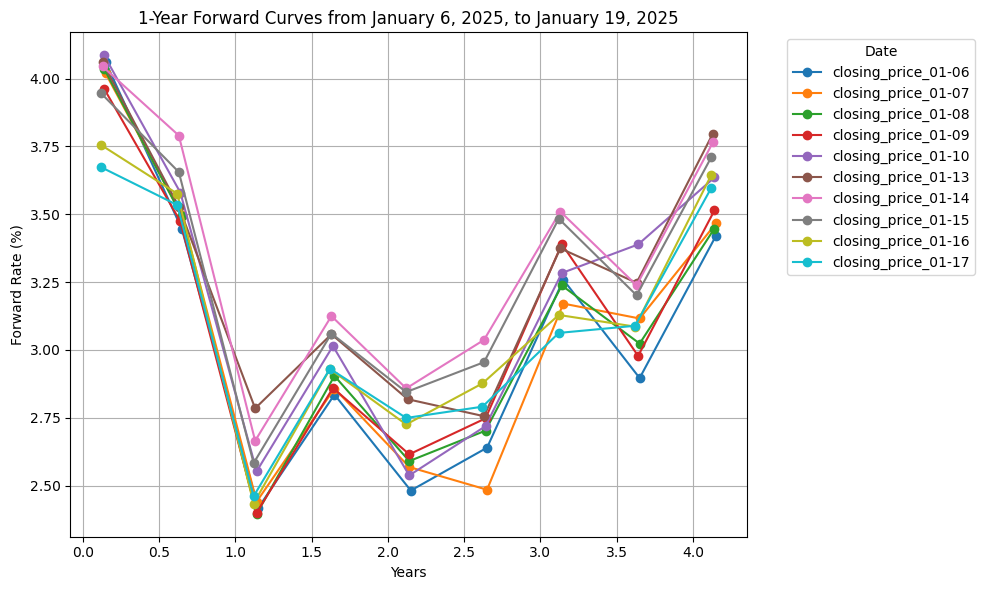

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for day, curve in forward_curves.items():
    if curve:  # Only plot if there are valid forward rates
        terms = [float(term.split("-")[1].replace("yr", "")) for term in curve.keys()]
        rates = list(curve.values())
        plt.plot(terms, rates, marker='o', linestyle='-', label=day)

plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.title("1-Year Forward Curves from January 6, 2025, to January 19, 2025")
plt.legend(title="Date", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
import numpy as np
import pandas as pd

# Example data for yields (replace with your actual data)
yield_data = {
    "01-06": [0.010829,0.06671,0.060079,0.057252,0.058293],
    "01-07": [0.010829,0.06692,0.060397,0.057252,0.058606],
    "01-08": [0.010427,0.06713,0.060503,0.058084,0.05918],
    "01-09": [0.010829,0.0665,0.059973,0.057945,0.059336],
    "01-10": [0.010427,0.068599,0.062522,0.059334,0.061115],
    "01-13": [0.010829,0.068389,0.063693,0.061145,0.062375],
    "01-14": [0.010829,0.070702,0.064652,0.062821,0.063954],
    "01-15": [0.009221,0.068599,0.062841,0.061284,0.062638],
    "01-16": [0.008819,0.066291,0.060291,0.058917,0.059702],
    "01-17": [0.008016,0.065242,0.059867,0.058431,0.05918],
}

# Example data for forward rates (replace with your actual data)
forward_data = {
    "01-06": [2.4175,2.482,3.2586,3.4206],
    "01-07": [2.441,2.5686,3.1709,3.4661],
    "01-08": [2.3962,2.5904,3.2378,3.4477],
    "01-09": [2.4001,2.6154,3.3903,3.5141],
    "01-10": [2.5531,2.5376,3.2836,3.6357],
    "01-13": [2.7848,2.8185,3.3745,3.7978],
    "01-14": [2.6653,2.8585,3.5101,3.7648],
    "01-15": [2.583,2.8449,3.4838,3.7108],
    "01-16": [2.434,2.7255,3.1291,3.6455],
    "01-17": [2.461,2.7494,3.0628,3.5978],
}

# Convert data to DataFrames
yield_df = pd.DataFrame(yield_data)
forward_df = pd.DataFrame(forward_data)

# Function to calculate daily log-returns
def calculate_log_returns(df):
    log_returns = np.log(df / df.shift(1)).dropna()
    return log_returns

# Calculate log-returns for yields and forward rates
yield_log_returns = calculate_log_returns(yield_df)
forward_log_returns = calculate_log_returns(forward_df)

# Calculate covariance matrices
yield_cov_matrix = yield_log_returns.cov()
forward_cov_matrix = forward_log_returns.cov()

# Print covariance matrices
print("Covariance Matrix for Yields:")
print(yield_cov_matrix)

print("\nCovariance Matrix for Forward Rates:")
print(forward_cov_matrix)

# Calculate eigenvalues and eigenvectors
yield_eigenvalues, yield_eigenvectors = np.linalg.eig(yield_cov_matrix)
forward_eigenvalues, forward_eigenvectors = np.linalg.eig(forward_cov_matrix)

# Print eigenvalues and eigenvectors
print("\nEigenvalues for Yields:")
print(yield_eigenvalues)

print("\nEigenvectors for Yields:")
print(yield_eigenvectors)

print("\nEigenvalues for Forward Rates:")
print(forward_eigenvalues)

print("\nEigenvectors for Forward Rates:")
print(forward_eigenvectors)

# Explanation of the first eigenvalue and eigenvector
print("\nExplanation:")
print("The first eigenvalue (largest in magnitude) represents the direction of maximum variance in the data.")
print("The associated eigenvector represents the weights of the variables in that direction.")

Covariance Matrix for Yields:
          01-06     01-07     01-08     01-09     01-10     01-13     01-14  \
01-06  0.870286  0.871482  0.889450  0.865652  0.897917  0.874579  0.891663   
01-07  0.871482  0.872700  0.890657  0.866824  0.899180  0.875785  0.892855   
01-08  0.889450  0.890657  0.909047  0.884727  0.917667  0.893837  0.911324   
01-09  0.865652  0.866824  0.884727  0.861070  0.893096  0.869871  0.886927   
01-10  0.897917  0.899180  0.917667  0.893096  0.926482  0.902404  0.919943   
01-13  0.874579  0.875785  0.893837  0.869871  0.902404  0.879090  0.896132   
01-14  0.891663  0.892855  0.911324  0.886927  0.919943  0.896132  0.913653   
01-15  0.951052  0.952321  0.972026  0.945998  0.981219  0.955846  0.974523   
01-16  0.957974  0.959230  0.979116  0.952903  0.988327  0.962791  0.981649   
01-17  0.993712  0.995021  1.015640  0.988427  1.025228  0.998795  1.018295   

          01-15     01-16     01-17  
01-06  0.951052  0.957974  0.993712  
01-07  0.952321  0.95923